# Beta Comparisons

You will read in the daily closing prices of social media stocks FB, TWTR, SNAP and the S&P 500 from `CSV` files and calculate the rolling 30-day beta values of each social media stock to plot the trends in volatility relative to the market.

## 1. Import Libaries and Dependencies
  - Import the `pandas` and `pathlib` libraries, and set the `%matplotlib inline` property.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create `Path` Objects
  - Create `Path` objects for each `CSV` file

In [2]:
# Create `Path` objects for each csv
fb_data = Path("../Resources/fb_data.csv")
twtr_data = Path("../Resources/twtr_data.csv")
snap_data = Path("../Resources/snap_data.csv")
sp500_data = Path("../Resources/sp500_data.csv")


## 3. Read `CSV` files in as DataFrames
  - Read the `CSV` files into Pandas DataFrames. Use the `index_col` parameter to set the index to be the `date` column. Set `parse_dates` and `infer_datetime_format` to `True`.

In [3]:
# Read the csv files into dataframes
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


## 4. Combine DataFrames, Sort Index, and Rename Columns
  - Combine the DataFrames using the columns for the `axis`.
  - Sort the `DataFrame` by `date`.
  - Rename the columns to each stock symbol.

In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index()

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,185.30,37.50,11.49,2859.530029
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-13,181.54,36.59,10.11,2811.870117


## 5. Calculate Daily Returns
  - Use the `pct_change` function to calculate daily returns for each stock.

In [5]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,NaN,NaN,NaN,NaN
2019-05-16,0.009120,0.021333,-0.006092,0.005872
2019-05-15,-0.003850,-0.010444,-0.066550,-0.008817
2019-05-14,-0.029742,-0.025594,-0.015947,-0.005805
2019-05-13,0.004482,-0.009207,-0.036225,-0.007952


## 6. Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns
  - Calculate the overall covariances of each stock's daily returns to that of the S&P 500. Calculate the overall variance of S&P 500 daily returns.

In [6]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_covariance = daily_returns['FB'].cov(daily_returns['S&P 500'])
twtr_covariance = daily_returns['TWTR'].cov(daily_returns['S&P 500'])
snap_covariance = daily_returns['SNAP'].cov(daily_returns['S&P 500'])

snap_covariance

8.143752411104528e-05

## 7. Calculate Variance of S&P 500 Returns

In [7]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.065620867765688e-05

## 8. Calculate Beta Values of Social Media Stocks
  - The beta value is the ratio between covariance and variance
  - $\beta = \frac{cov(R_{e},R_{m})}{var(R_{m})}$

In [8]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_covariance / variance
twtr_beta = twtr_covariance / variance
snap_beta = snap_covariance / variance

print(f"FB: {fb_beta} | TWTR: {twtr_beta} | SNAP: {snap_beta}")

FB: 1.281859508524622 | TWTR: 1.5193591987729476 | SNAP: 1.1525883660496732


## 9. Calculate 30-Day Rolling Betas of Social Media Stock Returns vs. S&P 500 Returns
  - Use the `rolling` method to first calculate covariance for each stock.
  - Calculate the `rolling` variance of the SP500
  - Calculate the `rolling` beta for each stock

In [9]:
# Calculate 30-day rolling covariance for each stock
rolling_fb_covariance = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_twtr_covariance = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_snap_covariance = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of each stock
rolling_fb_beta = rolling_fb_covariance / rolling_variance
rolling_twtr_beta = rolling_twtr_covariance / rolling_variance
rolling_snap_beta = rolling_snap_covariance / rolling_variance
rolling_snap_beta

date
2019-05-17         NaN
2019-05-16         NaN
2019-05-15         NaN
2019-05-14         NaN
2019-05-13         NaN
                ...   
2017-03-08   -0.767753
2017-03-07   -1.540314
2017-03-06   -0.991353
2017-03-03   -0.070131
2017-03-02    0.268084
Length: 557, dtype: float64

## 10. Plot Rolling 30-Day Betas of Social Media Stocks
  - Remember to set the `ax` parameter when plotting multiple datasets on a single chart figure.

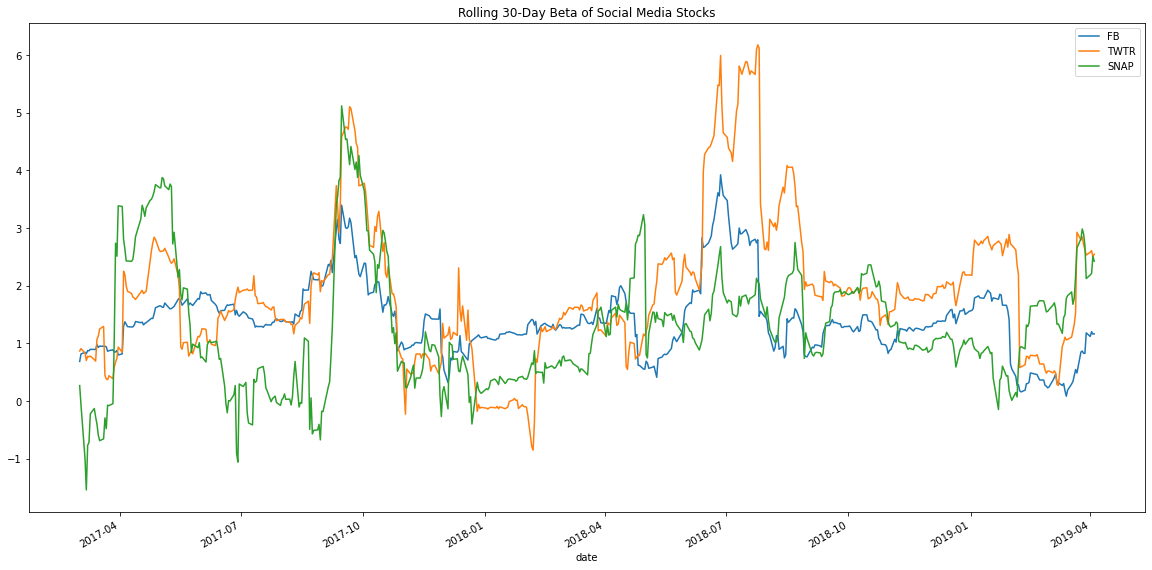

In [10]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_fb_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Social Media Stocks')
rolling_twtr_beta.plot(ax=ax)
rolling_snap_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB", "TWTR", "SNAP"])